In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [36]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [37]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

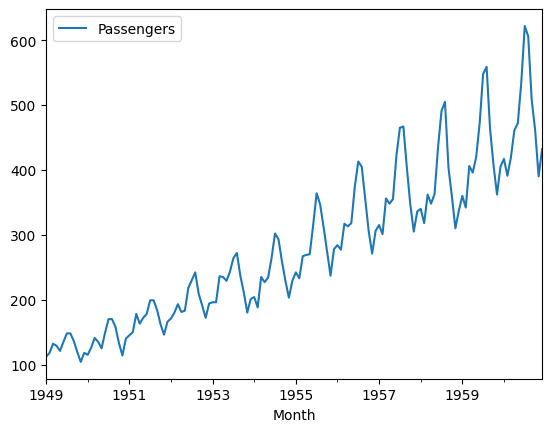

In [38]:
df.plot();

In [39]:
adfuller(df['Passengers'])

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [40]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [41]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [42]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060498
P-Value: 0.991880243437641
Non-Stationary


In [43]:
adf(np.random.randn(100)) # This stationarity is STRONG STATIONARITY because random variables are INDEPENDENT & IDENTICALLY DISTRIBUTED

Test-Statistic: -8.288474407438986
P-Value: 4.3258086325505056e-13
Stationary


In [44]:
adf(np.random.gamma(1, 1, 100)) # This stationarity is STRONG STATIONARITY because random variables are INDEPENDENT & IDENTICALLY DISTRIBUTED

Test-Statistic: -8.859504845319314
P-Value: 1.4961451640810634e-14
Stationary


In [45]:
df['LogPassengers'] = np.log(df['Passengers'])

In [46]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069683
P-Value: 0.4223667747703874
Non-Stationary


In [47]:
df['Diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

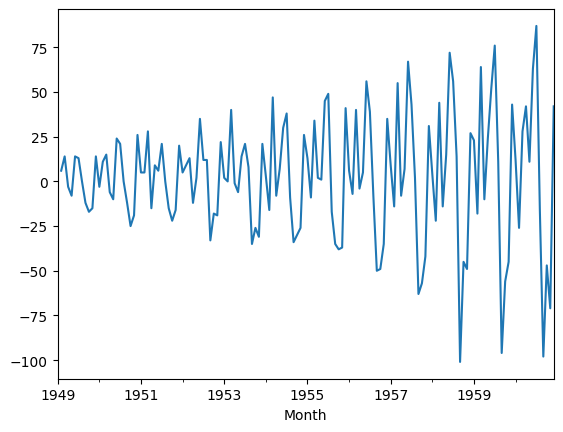

In [48]:
df['Diff'].plot()

In [49]:
adf(df['Diff'].dropna()) # using dropna because differencing causes first row to become NAN

Test-Statistic: -2.8292668241700047
P-Value: 0.05421329028382478
Non-Stationary


In [50]:
df['DiffLog'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

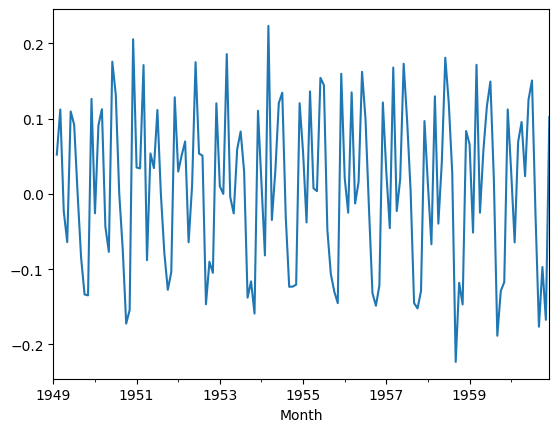

In [51]:
df['DiffLog'].plot()

In [52]:
adf(df['DiffLog'].dropna()) # using dropna because differencing causes first row to become NAN

Test-Statistic: -2.717130598388114
P-Value: 0.07112054815086184
Non-Stationary


In [53]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [54]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [55]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [56]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [57]:
goog['LogPrice'] = np.log(goog['Close'])

In [58]:
goog['LogRet'] = goog['LogPrice'].diff()

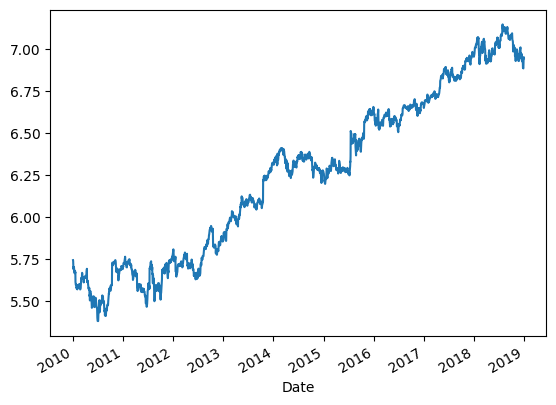

In [59]:
goog['LogPrice'].plot();

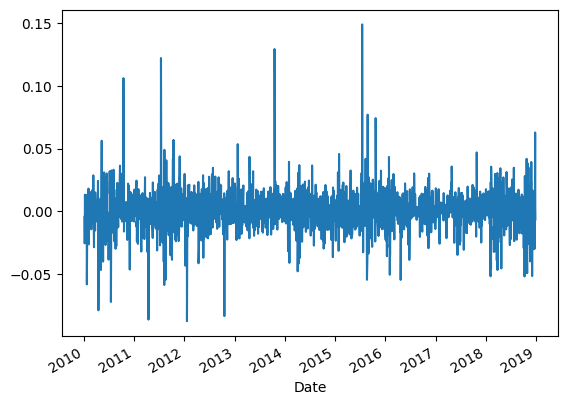

In [60]:
goog['LogRet'].plot();

In [61]:
adf(goog['LogPrice'])

Test-Statistic: -0.41819025789061465
P-Value: 0.9070170677498406
Non-Stationary


In [62]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773676
P-Value: 0.0
Stationary


In [63]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

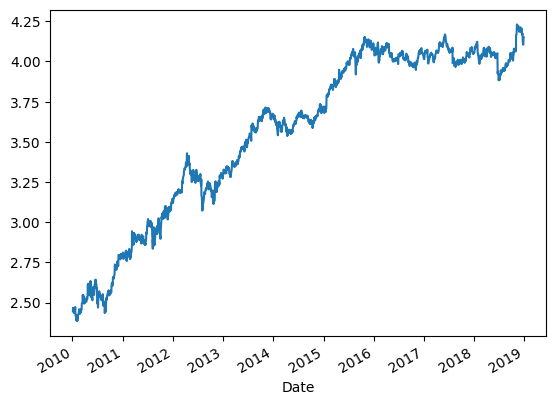

In [64]:
sbux['LogPrice'].plot();

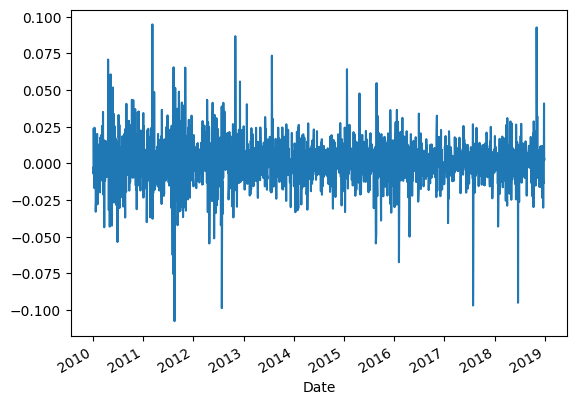

In [65]:
sbux['LogRet'].plot();

In [66]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583900034
P-Value: 0.33111455698537456
Non-Stationary


In [67]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958055
P-Value: 0.0
Stationary
